TASK:
Based on Neuron class implement ANN as in the image below and provide code to draw / visualize its structure:
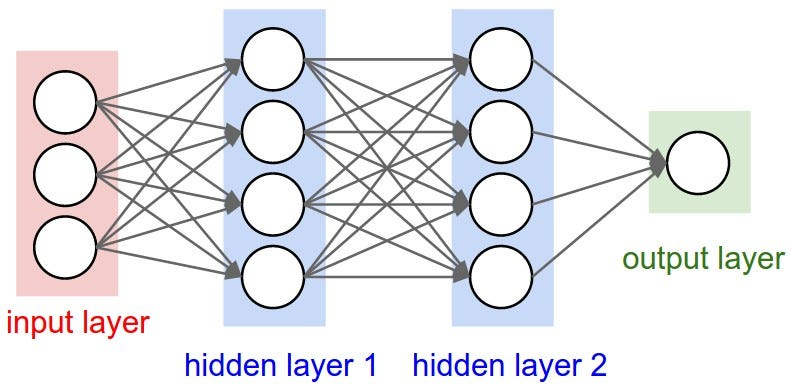


Solution:

Output: [5.18904455]


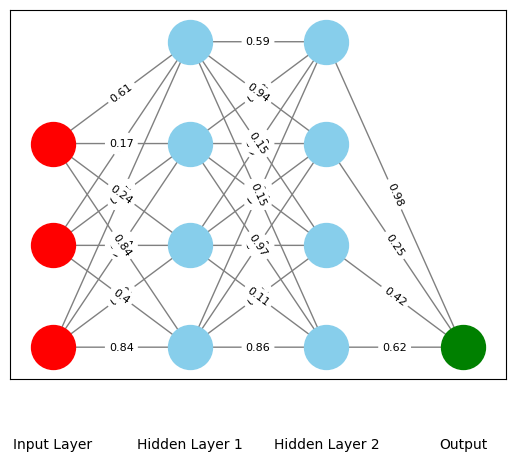

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

class Neuron:
    def __init__(self, n_inputs, bias=0., weights=None):
        self.b = bias
        if weights:
            self.ws = np.array(weights)
        else:
            self.ws = np.random.rand(n_inputs)

    def _f(self, x):  # activation function (here: leaky_relu)
        return max(x * .1, x)

    def __call__(self, xs):  # calculate the neuron's output
        return self._f(xs @ self.ws + self.b)

class ANN:
    def __init__(self):
        self.layers = [
            [Neuron(3) for _ in range(4)],  # 1st hidden layer with 4 neurons
            [Neuron(4) for _ in range(4)],  # 2nd hidden layer with 4 neurons
            [Neuron(4)]  # output layer with 1 neuron
        ]

    def forward(self, inputs):
        layer_outputs = inputs
        for layer in self.layers:
            layer_outputs = np.array([neuron(layer_outputs) for neuron in layer])
        return layer_outputs

    def visualize_connections(self):
        G = nx.DiGraph()
        input_nodes = []
        hidden_nodes = []
        output_nodes = []

        # Add input layer nodes
        for i in range(3):  # Assuming 3 input neurons
            node_name = f"N{i}"
            G.add_node(node_name, pos=(0, i))
            input_nodes.append(node_name)

        # Add other layer nodes and connections
        for i, layer in enumerate(self.layers, start=1):
            for j, neuron in enumerate(layer):
                if i == len(self.layers):  # Position the output neuron in the middle
                    node_name = f"N{i}{j}"
                    G.add_node(node_name, pos=(i * 4, len(layer) // 2))
                else:
                    node_name = f"N{i}{j}"
                    G.add_node(node_name, pos=(i * 4, j))  # Increased distance between layers

                if i == 1:  # Connect input layer to the first hidden layer
                    for k in range(3):  # Assuming 3 input neurons
                        input_node_name = f"N{k}"
                        G.add_edge(input_node_name, node_name, weight=neuron.ws[k])
                else:  # Connect other layers
                    prev_layer = self.layers[i - 2]
                    for k, prev_neuron in enumerate(prev_layer):
                        prev_node_name = f"N{i-1}{k}"
                        G.add_edge(prev_node_name, node_name, weight=neuron.ws[k])

                if i < len(self.layers):
                    hidden_nodes.append(node_name)
                else:
                    output_nodes.append(node_name)

        pos = nx.get_node_attributes(G, 'pos')
        nx.draw_networkx_nodes(G, pos, nodelist=input_nodes, node_color='red', node_size=1000)
        nx.draw_networkx_nodes(G, pos, nodelist=hidden_nodes, node_color='skyblue', node_size=1000)
        nx.draw_networkx_nodes(G, pos, nodelist=output_nodes, node_color='green', node_size=1000)
        nx.draw_networkx_edges(G, pos, edge_color='gray')
        edge_labels = {(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

        # Add layer annotations
        layer_names = ['Input Layer', 'Hidden Layer 1', 'Hidden Layer 2', 'Output']
        for i, layer_name in enumerate(layer_names):
            plt.text(i * 4, -1, layer_name, fontsize=10, ha='center')  # Increased distance between layers

        plt.show()

# Testing the ANN
ann = ANN()

inputs = np.array([0.5, 0.3, 0.8])
output = ann.forward(inputs)
print("Output:", output)

# Visualize the connections
ann.visualize_connections()

Task:
Dla sieci zaimplementowanej w poprzedniej sekcji dodaj propagację wsteczną.

Solution:

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt



# def visualize_connections(self):
#         G = nx.DiGraph()
#         input_nodes = []
#         hidden_nodes = []
#         output_nodes = []

#         # Add input layer nodes
#         for i in range(3):  # Assuming 3 input neurons
#             node_name = f"N{i}"
#             G.add_node(node_name, pos=(0, i))
#             input_nodes.append(node_name)

#         # Add other layer nodes and connections
#         for i, layer in enumerate(self.layers, start=1):
#             for j, neuron in enumerate(layer):
#                 if i == len(self.layers):  # Position the output neuron in the middle
#                     node_name = f"N{i}{j}"
#                     G.add_node(node_name, pos=(i * 4, len(layer) // 2))
#                 else:
#                     node_name = f"N{i}{j}"
#                     G.add_node(node_name, pos=(i * 4, j))  # Increased distance between layers

#                 if i == 1:  # Connect input layer to the first hidden layer
#                     for k in range(3):  # Assuming 3 input neurons
#                         input_node_name = f"N{k}"
#                         G.add_edge(input_node_name, node_name, weight=neuron.ws[k])
#                 else:  # Connect other layers
#                     prev_layer = self.layers[i - 2]
#                     for k, prev_neuron in enumerate(prev_layer):
#                         prev_node_name = f"N{i-1}{k}"
#                         G.add_edge(prev_node_name, node_name, weight=neuron.ws[k])

#                 if i < len(self.layers):
#                     hidden_nodes.append(node_name)
#                 else:
#                     output_nodes.append(node_name)

#         pos = nx.get_node_attributes(G, 'pos')
#         nx.draw_networkx_nodes(G, pos, nodelist=input_nodes, node_color='red', node_size=1000)
#         nx.draw_networkx_nodes(G, pos, nodelist=hidden_nodes, node_color='skyblue', node_size=1000)
#         nx.draw_networkx_nodes(G, pos, nodelist=output_nodes, node_color='green', node_size=1000)
#         nx.draw_networkx_edges(G, pos, edge_color='gray')
#         edge_labels = {(u, v): round(d['weight'], 2) for u, v, d in G.edges(data=True)}
#         nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

#         # Add layer annotations
#         layer_names = ['Input Layer', 'Hidden Layer 1', 'Hidden Layer 2', 'Output']
#         for i, layer_name in enumerate(layer_names):
#             plt.text(i * 4, -1, layer_name, fontsize=10, ha='center')  # Increased distance between layers

#         plt.show()


class Neuron:
    def __init__(self, n_inputs, bias=0., weights=None):
        self.b = bias
        if weights:
            self.ws = np.array(weights)
        else:
            self.ws = np.random.rand(n_inputs)

    def _f(self, x):  # activation function (leaky_relu)
        return max(x * .1, x)

    def _df(self, x):  # derivative of the activation function (leaky_relu)
        return 0.1 if x < 0 else 1

    def __call__(self, xs):  # calculate the neuron's output
        return self._f(xs @ self.ws + self.b)


class ANN:
    def __init__(self, learning_rate=0.01):
        self.layers = [
            [Neuron(3) for _ in range(4)],  # 1st hidden layer with 4 neurons
            [Neuron(4) for _ in range(4)],  # 2nd hidden layer with 4 neurons
            [Neuron(4)]  # output layer with 1 neuron
        ]
        self.learning_rate = learning_rate

        

    def forward(self, inputs):
        layer_outputs = inputs
        for layer in self.layers:
            layer_outputs = np.array([neuron(layer_outputs) for neuron in layer]).T
        return layer_outputs




    def loss(self, y_pred, y_true):  # mean squared error (MSE) loss
        return 0.5 * np.mean((y_pred - y_true) ** 2)




    def loss_derivative(self, y_pred, y_true):  # derivative of the MSE loss
        return y_pred - y_true





    def backpropagation(self, inputs, y_true):
        # Perform a forward pass and store intermediate outputs for each neuron
        outputs = [inputs]
        layer_outputs = inputs
        for layer in self.layers:
            layer_outputs = np.array([neuron(layer_outputs) for neuron in layer])
            outputs.append(layer_outputs)

        # Compute the error gradient for the output layer (loss derivative * activation function derivative)
        last_delta = self.loss_derivative(outputs[-1], y_true) * self.layers[-1][0]._df(outputs[-2] @ self.layers[-1][0].ws)
        # Store the gradients for weights and biases
        d_weights_list = [np.outer(last_delta, outputs[-2])]
        d_biases_list = [last_delta]

        # Iterate through the hidden layers in reverse order
        for l in range(len(self.layers) - 2, -1, -1):
            layer = self.layers[l]
            next_layer = self.layers[l + 1]
            layer_d_weights = []
            layer_d_biases = []
            
            # Compute the error gradient for each neuron in the current layer
            for j, neuron in enumerate(layer):
                inner_delta = np.sum([next_neuron.ws[j] * last_delta for next_neuron, last_delta in zip(next_layer, last_delta)]) * neuron._df(outputs[l] @ neuron.ws)
                # Store the gradients for the weights and biases of the current neuron
                layer_d_weights.append(np.outer(inner_delta, outputs[l]).reshape(neuron.ws.shape))
                layer_d_biases.append(inner_delta)
            
            # Add the computed gradients to the lists
            d_weights_list.insert(0, layer_d_weights)
            d_biases_list.insert(0, layer_d_biases)

        # Update the weights and biases using the gradients and the learning rate
        for l, layer in enumerate(self.layers):
            for neuron, d_weight, d_bias in zip(layer, d_weights_list[l], d_biases_list[l]):
                neuron.ws -= self.learning_rate * d_weight
                neuron.b -= self.learning_rate * d_bias





    def train(self, inputs, y_true, epochs=100):
        assert len(inputs) == len(y_true)
        for _ in range(epochs):
            for single_input, single_y_true in zip(inputs, y_true):
                y_pred = self.forward(single_input)
                self.backpropagation(single_input, single_y_true)







# Test the artificial neural network (ANN) for the OR operation
ann_or = ANN()

inputs_or = np.array([[0, 0, 0],
                      [0, 1, 0],
                      [1, 0, 0],
                      [1, 1, 0]])

y_true_or = np.array([[0],
                      [1],
                      [1],
                      [1]])

ann_or.train(inputs_or, y_true_or, epochs=1000)

threshold = 0.5

print("\nPredictions for the OR operation after training:")
print("-" * 42)
print("| Input (A, B) | Predicted | Value.    |")
print("-" * 42)

#if the value is <0.5 == 0 if the value > 0.5 then 1 
for i in inputs_or:
    prediction = ann_or.forward(i)[0]
    binary_prediction = 1 if prediction >= threshold else 0
    print(f"|   {i[0]}   |   {i[1]}   |    {binary_prediction}    |   {prediction:.4f}   |")
    print("-" * 42)

#visualize_connections(ann_or)


Predictions for the OR operation after training:
------------------------------------------
| Input (A, B) | Predicted | Value.    |
------------------------------------------
|   0   |   0   |    0    |   0.2631   |
------------------------------------------
|   0   |   1   |    1    |   0.7451   |
------------------------------------------
|   1   |   0   |    1    |   0.7280   |
------------------------------------------
|   1   |   1   |    1    |   1.2100   |
------------------------------------------
